In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __init__ import *
import numpy as np
from export.saver import read_pickle, save_pickle
from read.svg_reader import SVGReader
from helpers.helpers import filter_none
from placement2.attract import *
from visuals.plotter import plot_general
from copy import deepcopy
import networkx as nx
from itertools import pairwise, accumulate, product
from functools import reduce
from operator import add
from helpers.helpers import sort_and_group_objects
from domains.domain import Domain
from placement2.neighbors import *
from placement2.connectivity import *
from fixes.problem_types.hole_id import *
from new_solutions.selection import *


In [3]:
import os

In [16]:
edges = [
    (
        ('bedroom_1', 'transit_space'),
        'DOOR',
        '0'
    ),
    (('bedroom_1', 'laundry'), 'DOOR', '1'),
    (('bath', 'm_bedroom'), 'DOOR', '1'),
    (('m_closet', 'EAST'), 'WINDOW', '3'),
    (('closet', 'EAST'), 'WINDOW', '3'),
    (('bedroom_2', 'kitchen'), 'DOOR', '0'),
    (
        ('bedroom_2', 'transit_space'),
        'DOOR',
        '0'
    ),
    (('WEST', 'bedroom_1'), 'WINDOW', '3')
]

In [17]:
Gconn = nx.DiGraph()

for e in edges:
    [u,v], stype, id = e
    Gconn.add_edge(u,v, details={"stype": stype, "id": id})

In [24]:
Gjson = nx.node_link_data(Gconn)
Gjson

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 'bedroom_1'},
  {'id': 'transit_space'},
  {'id': 'laundry'},
  {'id': 'bath'},
  {'id': 'm_bedroom'},
  {'id': 'm_closet'},
  {'id': 'EAST'},
  {'id': 'closet'},
  {'id': 'bedroom_2'},
  {'id': 'kitchen'},
  {'id': 'WEST'}],
 'links': [{'details': {'stype': 'DOOR', 'id': '0'},
   'source': 'bedroom_1',
   'target': 'transit_space'},
  {'details': {'stype': 'DOOR', 'id': '1'},
   'source': 'bedroom_1',
   'target': 'laundry'},
  {'details': {'stype': 'DOOR', 'id': '1'},
   'source': 'bath',
   'target': 'm_bedroom'},
  {'details': {'stype': 'WINDOW', 'id': '3'},
   'source': 'm_closet',
   'target': 'EAST'},
  {'details': {'stype': 'WINDOW', 'id': '3'},
   'source': 'closet',
   'target': 'EAST'},
  {'details': {'stype': 'DOOR', 'id': '0'},
   'source': 'bedroom_2',
   'target': 'kitchen'},
  {'details': {'stype': 'DOOR', 'id': '0'},
   'source': 'bedroom_2',
   'target': 'transit_space'},
  {'details': {'stype': 

In [4]:
path = "/Users/julietnwagwuume-ezeoke/_UILCode/gqe-phd/svg2plan/svg_imports"
files = []
for entry in os.listdir(path):
    if not os.path.isdir(os.path.join(path, entry)):
        files.append(entry)

In [5]:
os.listdir(path)

['amber_b_f01.svg', 'amber_c_f01.svg', 'amber_a_f01.svg']

In [6]:
files

['amber_b_f01.svg', 'amber_c_f01.svg', 'amber_a_f01.svg']

In [7]:
case  = "amber_a_f01.svg"
sv = SVGReader(case)
sv.run()
# ag = AdjacencyGenerator(sv.layout, buffer_size=0.17)
# ag.run() # TODO shouldnt run if sv.layout is empty
# ag.draw_graph()
domains = sv.layout.domains
pos = create_pos(domains)


In [8]:
plot_general(sv.layout.domains)


In [9]:
ad, graphs = adjust_domains(domains)
Gx, Gy = graphs

In [10]:
# draw_digraph(Gx, domains)

In [11]:
r, l = get_roots_and_leaves_for_dag(Gx)
r,l

(['bedroom_1', 'bedroom_2'], ['m_bedroom', 'closet', 'm_closet'])

In [12]:
ad

{'bedroom_1': Domain(bedroom_1, x=[0.00-3.22], y=[3.15-5.95]),
 'kitchen': Domain(kitchen, x=[3.22-5.02], y=[0.00-2.24]),
 'm_bath': Domain(m_bath, x=[4.82-7.14], y=[4.38-5.68]),
 'm_bedroom': Domain(m_bedroom, x=[7.34-9.47], y=[3.15-5.89]),
 'm_closet': Domain(m_closet, x=[8.38-9.38], y=[2.36-2.96]),
 'bath': Domain(bath, x=[5.02-7.34], y=[3.15-4.38]),
 'dining': Domain(dining, x=[5.02-8.38], y=[0.00-3.15]),
 'transit_space': Domain(transit_space, x=[3.22-5.02], y=[2.24-4.02]),
 'closet': Domain(closet, x=[8.38-9.38], y=[-0.05-2.36]),
 'bedroom_2': Domain(bedroom_2, x=[0.00-3.22], y=[0.00-3.15]),
 'laundry': Domain(laundry, x=[3.22-4.82], y=[4.02-5.77])}

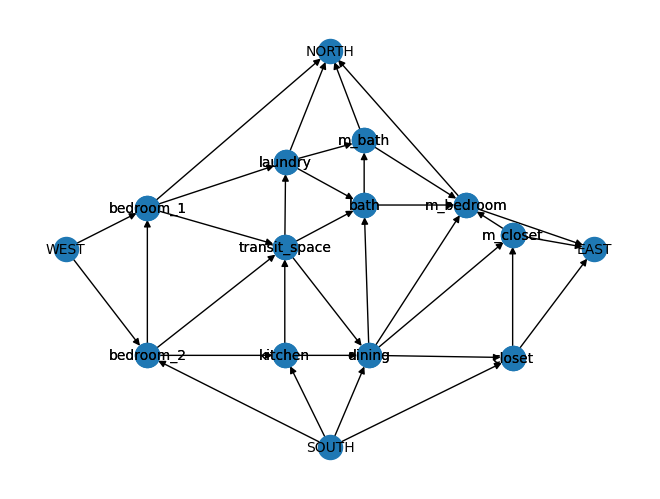

In [15]:
Gxd, Gyd = create_cardinal_dags(Gx, Gy)
draw_cardinal_dags(Gxd, Gyd, domains)


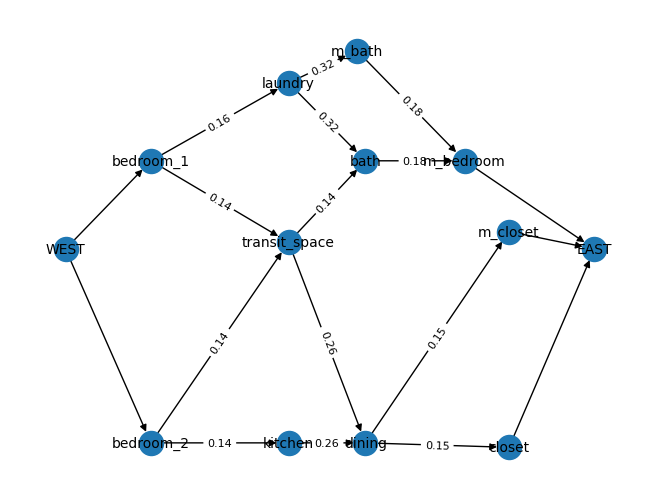

In [28]:
Gxd = create_dag_with_cardinal_directions(Gx, "x")
pos_xd=create_cardinal_positions(domains=ad, padding=2)
draw_digraph(Gxd, pos=pos_xd)

In [30]:
Gx.add_nodes_from([Direction.WEST, Direction.EAST])

In [29]:
from helpers.helpers import chain_flatten
from itertools import chain


chain.from_iterable([product(r, [Direction.WEST]), product(l, [Direction.EAST])])

In [27]:
[i for i in product(r, [Direction.WEST])]

[('bedroom_1', <Direction.WEST: 3>), ('bedroom_2', <Direction.WEST: 3>)]

In [31]:
Gx.add_edges_from(chain.from_iterable([product(r, [Direction.WEST]), product(l, [Direction.EAST])]))

In [32]:
Gx.edges

OutEdgeView([('bedroom_1', 'transit_space'), ('bedroom_1', 'laundry'), ('bedroom_1', <Direction.WEST: 3>), ('transit_space', 'bath'), ('transit_space', 'dining'), ('laundry', 'bath'), ('laundry', 'm_bath'), ('kitchen', 'dining'), ('dining', 'm_closet'), ('dining', 'closet'), ('m_bath', 'm_bedroom'), ('m_bedroom', <Direction.EAST: 2>), ('bath', 'm_bedroom'), ('m_closet', <Direction.EAST: 2>), ('closet', <Direction.EAST: 2>), ('bedroom_2', 'transit_space'), ('bedroom_2', 'kitchen'), ('bedroom_2', <Direction.WEST: 3>)])

In [15]:
pos = create_pos(domains)
type(pos["bedroom_1"][0])

float

In [18]:
create_cardinal_positions(pos)

{'bedroom_1': (0.0, 3.29),
 'kitchen': (3.36, 0.0),
 'm_bath': (5.3, 4.79),
 'm_bedroom': (7.8, 3.35),
 'm_closet': (8.93, 2.69),
 'bath': (5.3, 3.35),
 'dining': (5.42, 0.0),
 'transit_space': (3.36, 2.41),
 'closet': (8.93, -0.05),
 'bedroom_2': (0.0, 0.0),
 'laundry': (3.38, 4.31),
 'NORTH': (4.465, 9.19),
 'SOUTH': (4.465, -4.45),
 'EAST': (-4.4, 2.37),
 'WEST': (13.33, 2.37)}

In [66]:
coordinates = pos
x_values = [coord[0] for coord in coordinates.values()]
y_values = [coord[1] for coord in coordinates.values()]

x_values

[0.0, 3.36, 5.3, 7.8, 8.93, 5.3, 5.42, 3.36, 8.93, 0.0, 3.38]

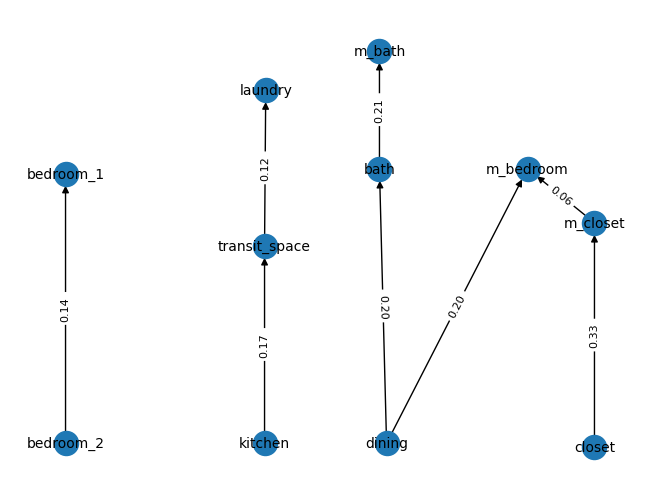

In [56]:
draw_digraph(Gy, domains)

In [53]:
west_nodes, *_, east_nodes = [i for i in nx.topological_generations(Gx)]

In [57]:
south_nodes, *_, north_nodes = [i for i in nx.topological_generations(Gy)]

print(south_nodes, north_nodes)

['kitchen', 'dining', 'closet', 'bedroom_2'] ['laundry', 'm_bath', 'm_bedroom']


In [60]:
roots = [n[0] for n in Gx.in_degree if n[1] == 0]
leaves = [n[0] for n in Gx.out_degree if n[1] == 0]
print(roots, leaves)

['bedroom_1', 'bedroom_2'] ['m_bedroom', 'm_closet', 'closet']


In [61]:
roots = [n[0] for n in Gy.in_degree if n[1] == 0]
leaves = [n[0] for n in Gy.out_degree if n[1] == 0]
print(roots, leaves)

['kitchen', 'dining', 'closet', 'bedroom_2'] ['m_bedroom', 'm_bath', 'laundry', 'bedroom_1']


In [54]:
west_nodes

['bedroom_1', 'bedroom_2']

In [55]:
east_nodes

['m_bedroom', 'm_closet', 'closet']

In [50]:
plot_general(ad)

In [49]:
playout = Layout(ad, graphs)
ps = create_hole_problems(Layout(ad, graphs))
ps[0].action_details

[wic-WEST-1.21, m_bath-EAST-1.21]

In [50]:
re = Reporter(playout)
re.run()

In [51]:
c = Cook(re)

initializing.. 0
running again -> 1
next best layout wic-PULL-for-HOLE near ['wic', 'm_bath']3-PS:-1.90-S:0.55


In [52]:
c.run_again()

running again -> 2
next best layout transit_1-STRETCH-for-HOLE near ['transit_1', 'm_bedroom']3-PS:-9.68-S:-3.34


In [53]:
c.run_again()

running again -> 3
next best layout m_bath-PULL-for-HOLE near ['transit_1', 'm_bath']2-PS:-9.94-S:-3.97


In [54]:
c.run_again()

running again -> 4
next best layout stair_bottom-PULL-for-HOLE near ['wic', 'stair_bottom']1-PS:-7.26-S:-3.13


In [55]:
c.run_again()

running again -> 5
next best layout transit_1-PULL-for-HOLE near ['wic', 'transit_1']0-PS:-2.42-S:-1.21


In [57]:
c.run_again()

No more results!


In [56]:
r = c.plot_all()

len sols = 5. Len indices = 9


In [58]:
plot_general(c.bl.layout.domains)